In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('churn_prediction_simple.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [ ]:
#seprating the dependent and independent variable
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [ ]:
#scaling data set
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [ ]:
#splitting the datraset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [ ]:
from sklearn.ensemble import BaggingClassifier as BC

In [ ]:
classifier=BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [ ]:
classifier.get_params()


{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
classifier=BC(base_estimator=LR(),n_estimators=150,
              n_jobs=-1, random_state=42)
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier=RFC()

In [ ]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predicted_values=classifier.predict(x_train)

print(classification_report(y_train,predicted_values))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [ ]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.71      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.85      0.86      0.85      4414



In [ ]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
  model.fit(x1,y1)

  predict=model.predict(x1)
  f1=f1_score(y1,predict)

  predict=model.predict(x2)
  f2=f1_score(y2,predict)

  return f1,f2

In [ ]:
def effect(train_score,test_score,x_axis,title):
  plt.figure(figsize=(7,4),dpi=130)
  plt.plot(x_axis,train_score,color='red',label='train_score')
  plt.plot(x_axis,test_score,color="g",label="test_score")
  plt.title(title)
  plt.xlabel('parameter values')
  plt.ylabel('f1 score')
  plt.legend()
  plt.show()


# **HyperParameter Tuining**


In [ ]:
classifier=RFC()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
estimators=[i for i in range (1,200,10)] #it was 600 but was takinng time so changed to 200
train=[]
test=[]
for i in estimators:
  model=RFC(class_weight='balanced_subsample',
            n_estimators=i,
            max_depth=7,
            random_state=101)
  f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

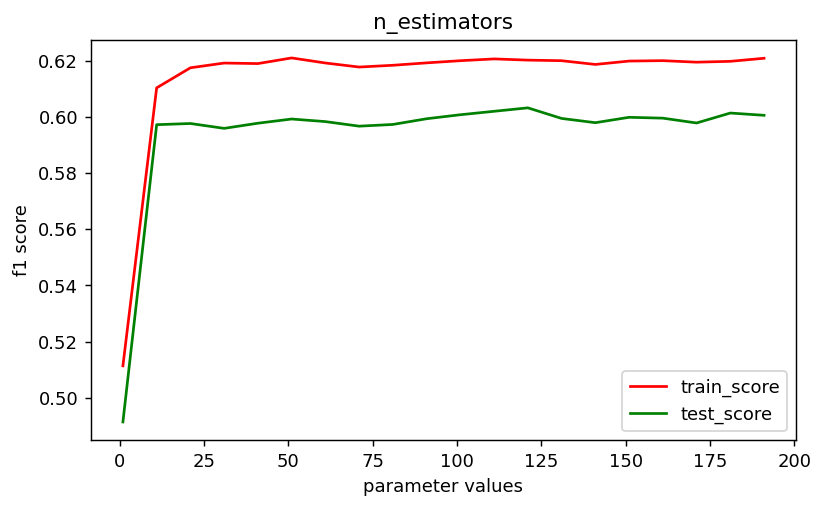

In [ ]:
effect(train,test,range(1,200,10),'n_estimators')

In [ ]:
maxsamples=[i/100 for i in range(1,100)] # it was 1000 but as its taking time so i changed to 100
train=[]
test=[]
for i in maxsamples:
  model=RFC(class_weight='balanced_subsample',
            n_estimators=50,
            max_depth=7,
            random_state=101,
            max_samples=i)
  f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

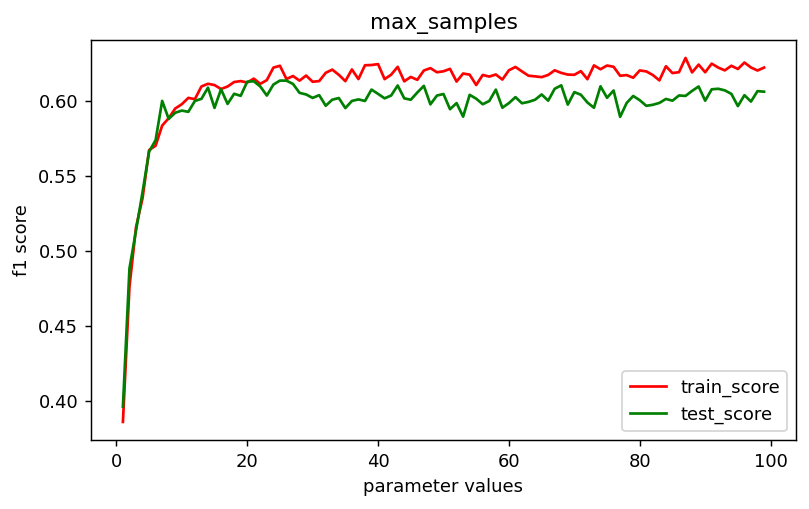

In [ ]:
effect(train,test,range(1,100),'max_samples')

## **max feture**

In [ ]:
maxfeatures=range(1,X.shape[1])
train=[]
test=[]

for i in maxfeatures:
  model=RFC(class_weight='balanced_subsample',n_estimators=50,n_jobs=-1,max_depth=7,
            random_state=101,max_features=i)
  f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

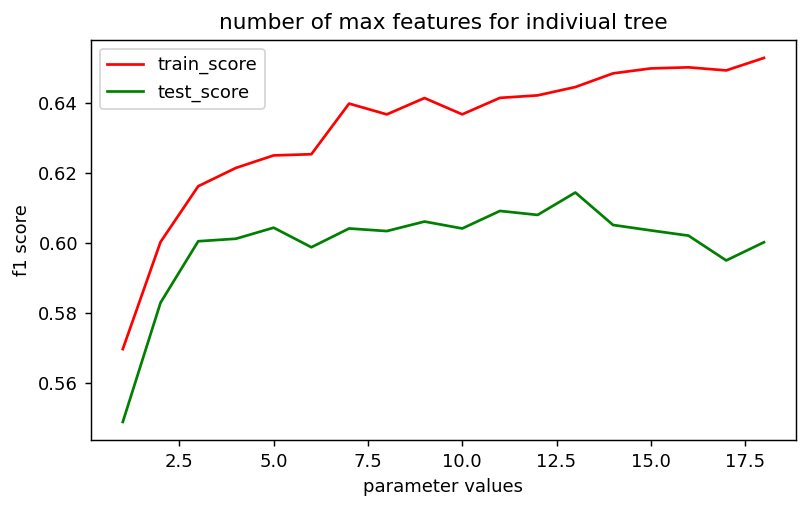

In [ ]:
effect(train,test,maxfeatures,'number of max features for indiviual tree')